In [1]:
cd ..

/Users/huttercl/Documents/StrokeRecovery/CorrelationGraph4Stroke_public


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from StrokeRecovery import utils
import numpy as np

In [3]:

change_version = 'v1.6'

patients = pd.read_excel('data/ds2a_patients_{}.xlsx'.format(change_version), index_col=[0])
limos = pd.read_excel('data/ds2b_limos_{}.xlsx'.format(change_version), index_col=[0,1])

plt.rcParams["font.family"] = utils.get_config()['plot_params']['font']
plt.rcParams['font.size'] = utils.get_config()['plot_params']['font_size']


In [4]:
def visualize_patients(ids, limosdf=limos, patientsdf=patients, columns = 3, showid=False):
    n = len(ids)
    if (n%columns) != 0:
        raise ValueError('columns dont get full')
        
    categories = limosdf.columns.values
        
    n_rows = int(n/columns)
    
    width = utils.get_config()['plot_params']['paper_width']
    fig, axes = plt.subplots(nrows=n_rows, ncols=columns, squeeze=False, figsize=(width, 0.9*width), sharex='all', sharey='all', dpi=utils.get_config()['plot_params']['dpi'])
    category_colors = utils.get_config()['category_colors']
    
    for j, idd in enumerate(ids):
        this_limos = limosdf.loc[idd]
        this_ax = axes[j//n_rows, j%n_rows]
        

        for cat in categories:
            vals = this_limos[cat]
            x = np.arange(len(vals))+1
            proper_cat_name = utils.get_category_rename_dict()[cat]
            this_ax.plot(x, vals, '.-' , label=proper_cat_name, color = category_colors[cat])
            this_ax.set_ylim([0.6, 5.4])
            this_ax.set_xlim([0.8, 7.2])
            
        if showid:
            this_ax.set_title(idd)
    

    fig.text(0.06, 0.5, 'ICF-chapter score' , va='center', rotation='vertical')
    fig.text(0.5, 0.07, 'weeks poststroke' , ha='center')
    
    sp = 0.123
    plt.subplots_adjust(wspace=sp, hspace=sp)
    

    
    handles, labels = this_ax.get_legend_handles_labels()

    fig.legend(handles, labels, loc='lower center',
               bbox_to_anchor = (0, -0.075, 1, 1),
           bbox_transform = plt.gcf().transFigure, ncol=2)
    
    return fig

        


In [5]:
patients['fulllabel'] = patients['diag_label'] + patients['loc_label']

# Make selection of patients

In [6]:
indexes=[1118,262,431,530,922,1062,862,1106,1148]

In [7]:
selected_patients = patients.loc[indexes]
# selected_patients.to_excel('figs/patient_examples/patients.xlsx')

In [8]:
def chunker(seq, size):
    for pos in range(0, len(seq), size):
        yield seq[pos:pos + size]

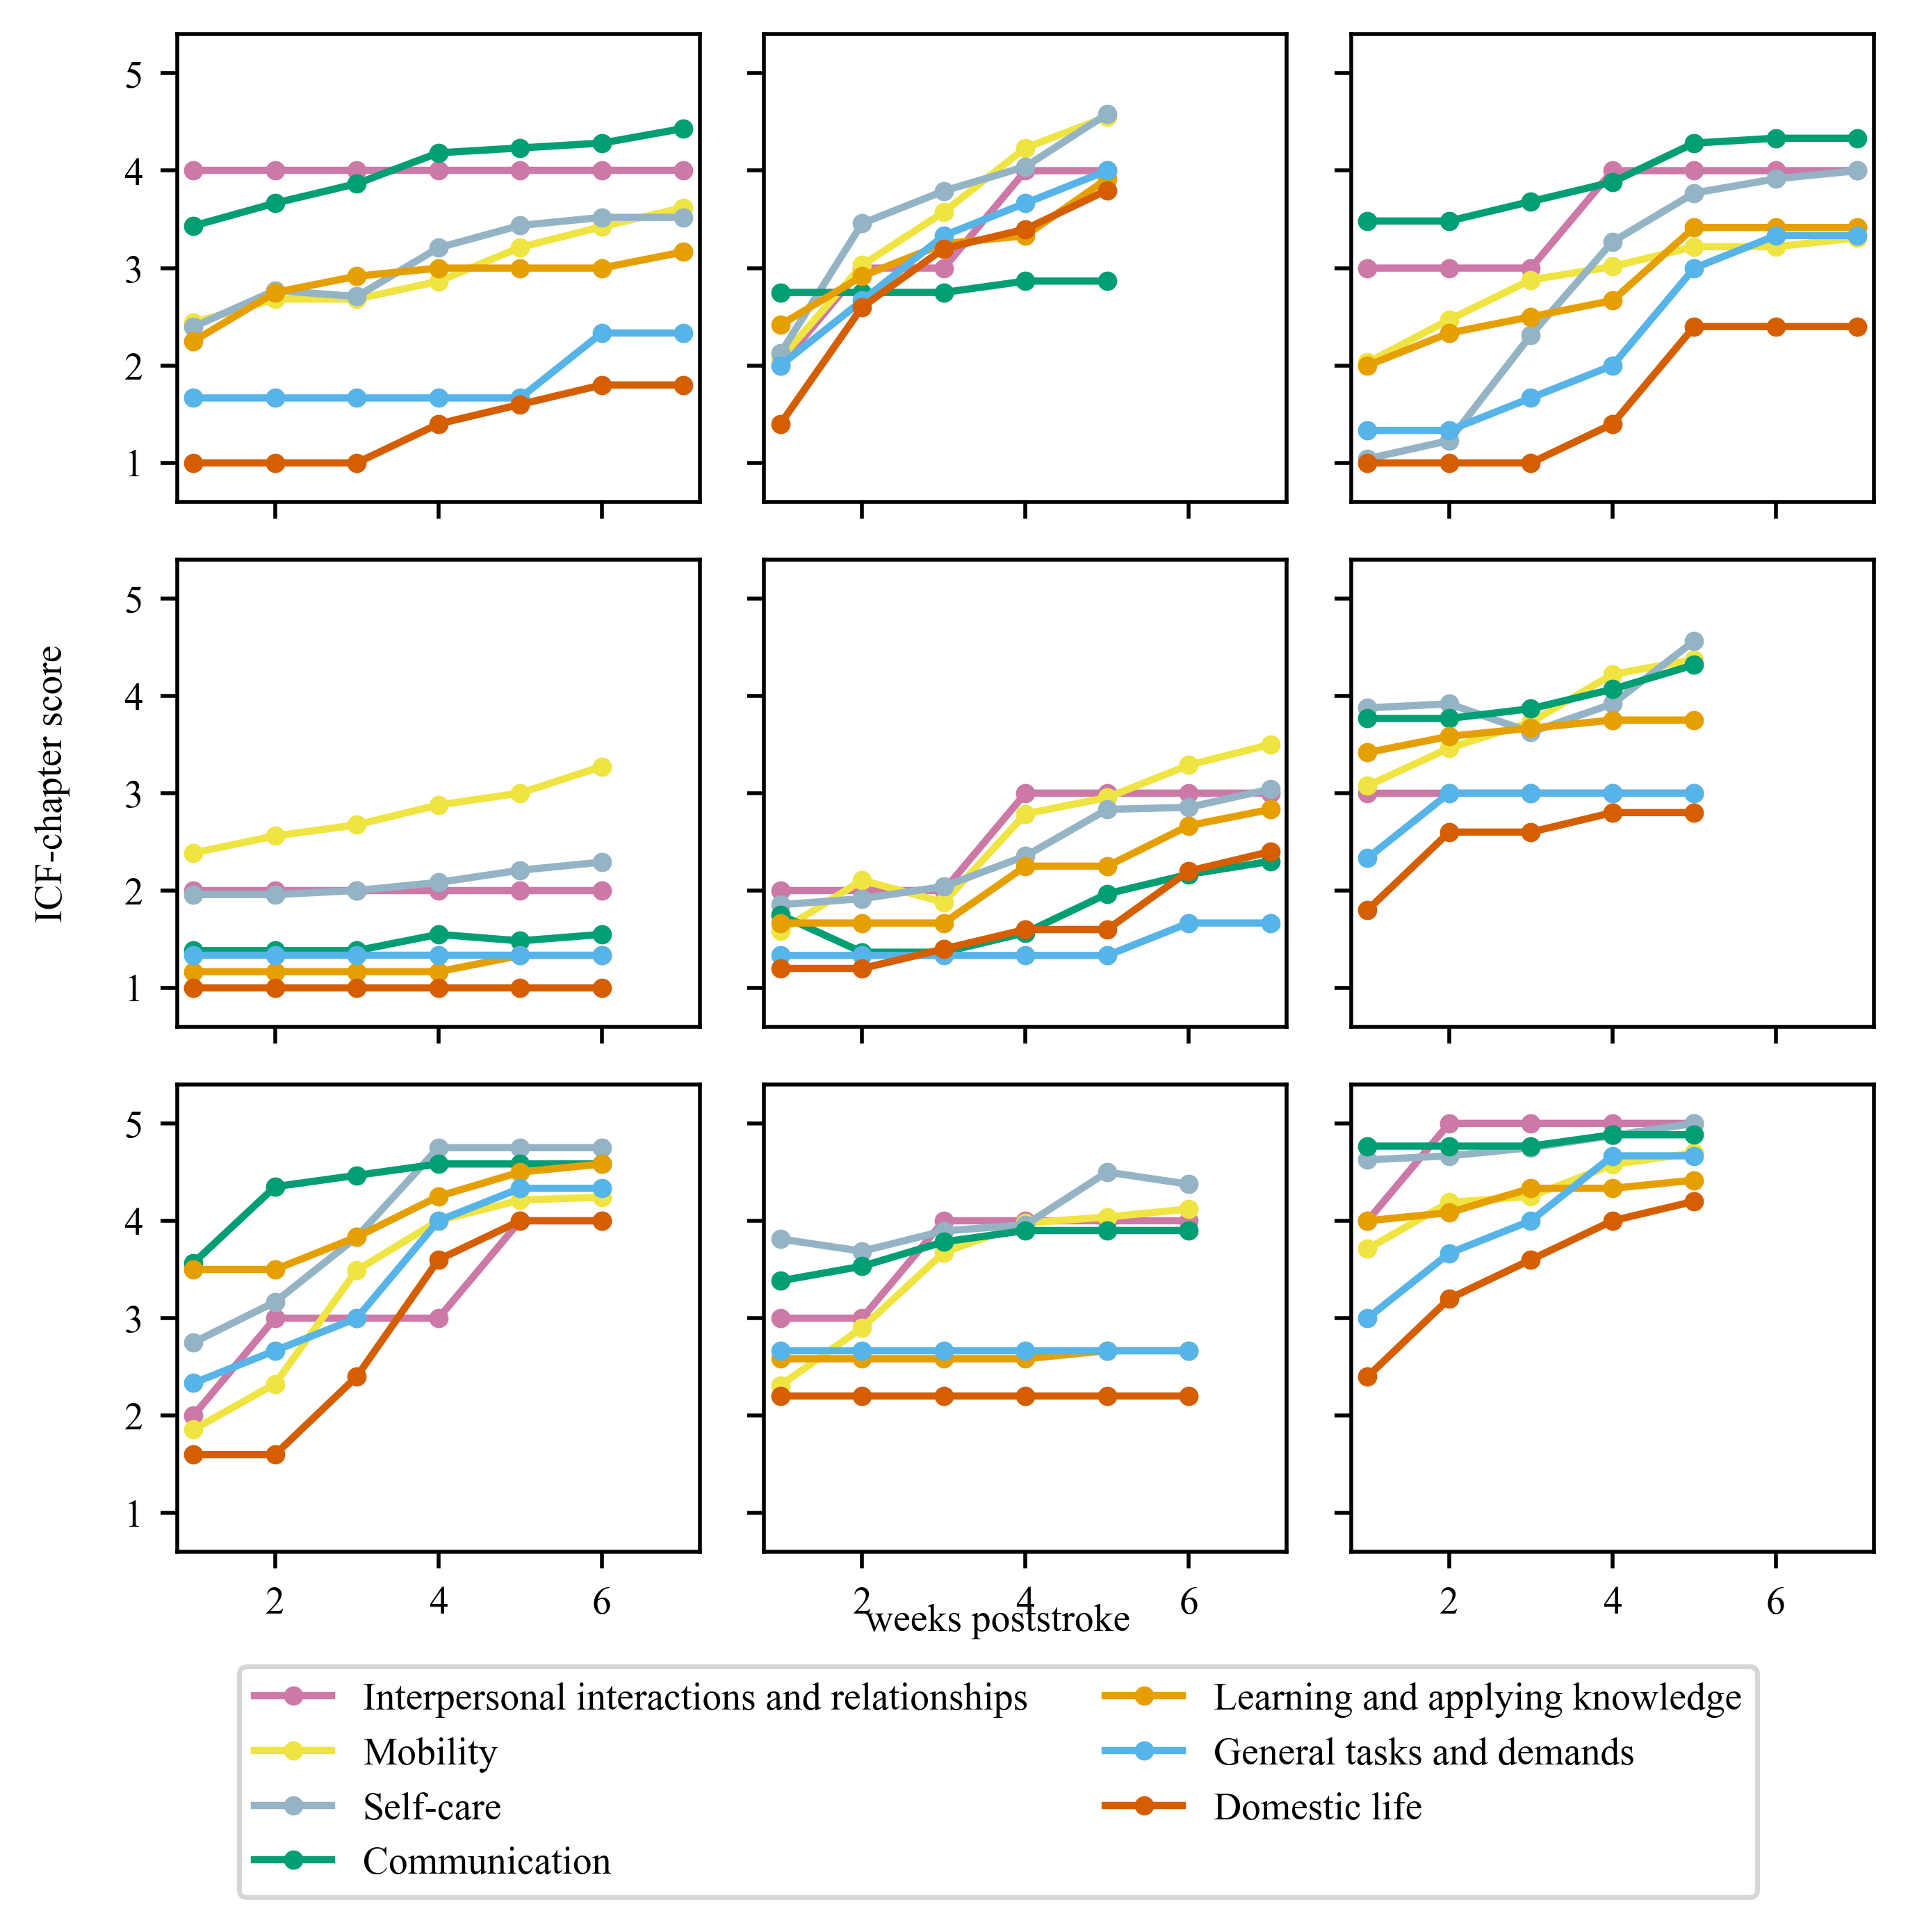

In [9]:
for chunkI, chunk in enumerate(chunker(indexes, 9)):
    thisfig = visualize_patients(chunk)
    figname = 'patients_chunk_{}.pdf'.format(chunkI)
    thisfig.savefig('figs/patient_examples/'+figname, bbox_inches='tight')